In [1]:
from DecisionTree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

In [2]:
dtc = DecisionTreeClassifier()
dtc.fit (np.array([[0,0,0,0]]), np.array([0]))

In [3]:
print(dtc)

Leaf: 0.000


In [4]:
X = np.random.random((10,2))
y = np.random.randint(0, 3, size=(10))
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
dtc.fit(X, y)
#y_pred = dtc.predict(X)
#print(y_pred, y, (y_pred==y).sum()/y.shape[0] )

print(dtc)

Decision: 0 < 0.636 ?
  Decision: 0 < 0.041 ?
    Leaf: 1.000
    Decision: 0 < 0.291 ?
      Decision: 0 < 0.098 ?
        Leaf: 2.000
        Leaf: 0.000
      Leaf: 2.000
  Leaf: 1.000


In [5]:
dtc.predict(np.array([[0,2,0,0]]))

array([1.])

In [6]:
import sklearn.datasets
import matplotlib.pyplot as plt

In [7]:
X, y = sklearn.datasets.make_blobs(centers = 3)

In [8]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtc.fit(X, y)
print(dtc)

Decision: 1 < -2.957 ?
  Leaf: 0.000
  Decision: 1 < 2.615 ?
    Leaf: 2.000
    Leaf: 1.000


In [9]:
from DecisionTree import Leaf, InternalNode
def add_decision_lines(node, x_lim, y_lim):
    if isinstance(node, InternalNode):
        decision = node.decision
        if decision.feature == 0:
            plt.vlines(x=decision.threshold, ymin=y_lim[0], ymax=y_lim[1])
            add_decision_lines(node.leftNode, (x_lim[0],decision.threshold), y_lim)
            add_decision_lines(node.rightNode,(decision.threshold,x_lim[1]) , y_lim)
        else:
            plt.hlines(y=decision.threshold, xmin=x_lim[0], xmax=x_lim[1])
            add_decision_lines(node.leftNode, x_lim,(y_lim[0],decision.threshold) )
            add_decision_lines(node.rightNode, x_lim,(decision.threshold,y_lim[1]))


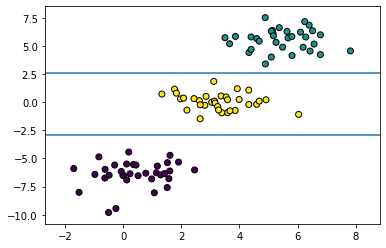

In [10]:
plt.scatter(X[:,0],X[:,1],c=y, edgecolor='k')
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
add_decision_lines(dtc.root, (x_min, x_max), (y_min, y_max))

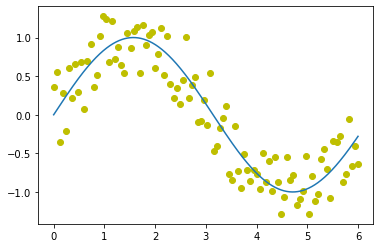

In [11]:
X = np.linspace(0,6,1000)
y = np.sin(X)
plt.plot(X,y)


X_train = np.linspace(0,6,100)
y_train = np.sin(X_train)+np.random.random(100)-0.5

plt.scatter(X_train,y_train, color='y')

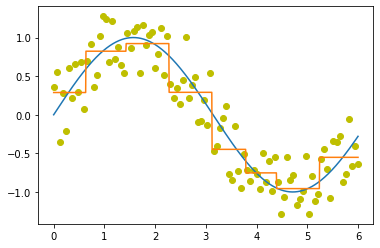

In [12]:
dtr = DecisionTreeRegressor(min_samples_leaf=10)

dtr.fit(X_train.reshape((-1,1)),y_train)
y_pred = dtr.predict(X.reshape((-1,1)))
plt.plot(X,y)
plt.plot(X, y_pred)
plt.scatter(X_train,y_train, color='y')

In [13]:
print(dtr)

Decision: 0 < 3.121 ?
  Decision: 0 < 2.273 ?
    Decision: 0 < 0.636 ?
      Leaf: 0.288
      Decision: 0 < 1.424 ?
        Leaf: 0.823
        Leaf: 0.922
    Leaf: 0.290
  Decision: 0 < 3.788 ?
    Leaf: -0.448
    Decision: 0 < 5.242 ?
      Decision: 0 < 4.394 ?
        Leaf: -0.753
        Leaf: -0.956
      Leaf: -0.552
